# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

<hr/>

## Multi Layer Perceptron

<br/>

<hr/>

### XOR 문제

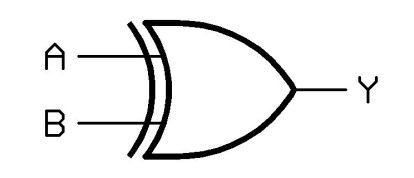

|A|B|XOR|
|:--:|:--:|:--:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

- XOR 문제는 단층 Perceptron으로는 해결할 수 없는 문제이다.

<br/>

<hr/>

### Multilayer Perceptron

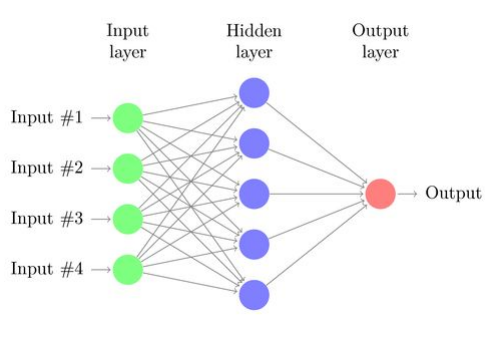

위 와 같이 2개 이상의 계층을 가지고 있는 구조를 **Multilayer Perceptron**이라고 한다. 다층구조는 **XOR 문제**를 아래와 같이 해결할 수 있다.

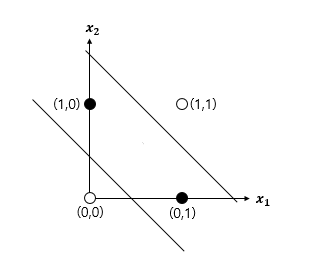

<br/>

<hr/>

### Back Propagation

역전파(Back Propagation) 알고리즘이 개발되면서 Multilayer Perceptron을 학습시킬 수 있게 되었다. 오차 역전파란 컴퓨터가 예측값의 정확도를 높이기 위해 출력값과 실제 예측하고자 하는 값을 비교하여 가중치를 변경하는 작업을 말한다.

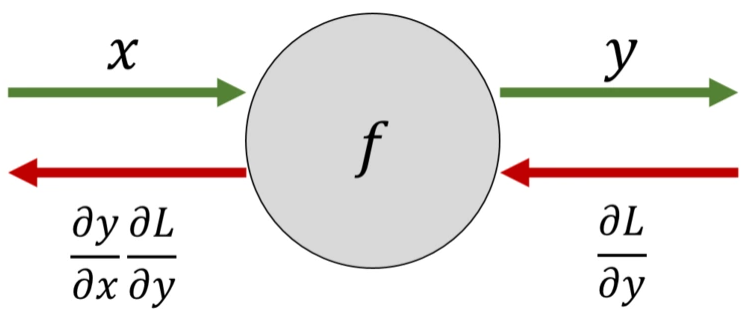

<br/>

역전파는 **미분의 연쇄법칙(Chain Rule)**과 큰 관련이 있다. 노드로 들어온 입력 신호에 그 노드의 편미분을 곱한 후 다음 노드로 전달하는 방식이다.

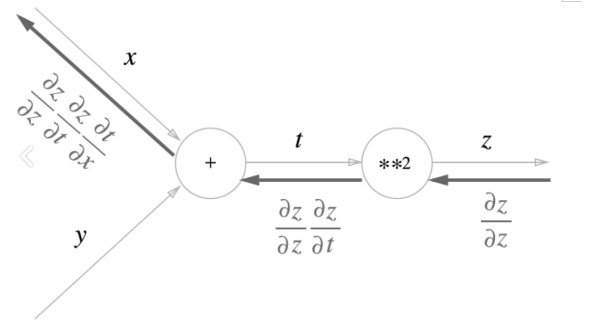

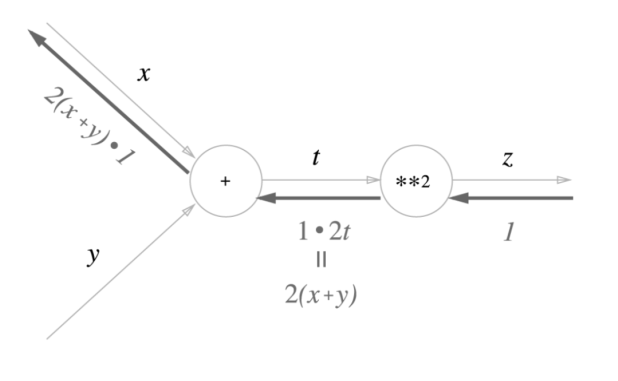
<그림자료 출처: https://deep-learning-study.tistory.com/16>

위의 그림에서 x, y의 값이 주어지면 z까지의 전파를 구할 수 있고, 오류값(Error)과 연쇄법칙(Chain Rule)을 이용해 역전파도 구할 수 있다.
 
<br/>

<hr/>

### Back Propagation 예제 코드

In [1]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [12]:
learning_rate = 0.5

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# nn Layers
w1 = torch.Tensor(2, 2).to(device)
b1 = torch.Tensor(2).to(device)
w2 = torch.Tensor(2, 1).to(device)
b2 = torch.Tensor(1).to(device)

def sigmoid(x):
    return 1.0 / (1.0 + torch.exp(-x))

# 시그모이드 함수를 미분한 값
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

for step in range(10001):
    l1 = torch.add(torch.matmul(X, w1), b1)
    a1 = sigmoid(l1)
    l2 = torch.add(torch.matmul(a1, w2), b2)
    Y_pred = sigmoid(l2)

    # binary_cross_entropy_loss
    cost = -torch.mean(Y * torch.log(Y_pred) + (1 - Y) * torch.log(1 - Y_pred))
    
    #### Back Propagation 부분 ####
    # Loss derivation
    # 1e-7는 0으로 나눠지는 것을 막기위한 항
    d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)
                               
    # Layer2
    d_l2 = d_Y_pred * sigmoid_prime(l2)
    d_b2 = d_l2
    d_w2 = torch.matmul(torch.transpose(a1, 0, 1), d_b2)
    
    # Layer1
    d_a1 = torch.matmul(d_b2, torch.transpose(w2, 0, 1))
    d_l1 = d_a1 * sigmoid_prime(l1)
    d_b1 = d_l1
    d_w1 = torch.matmul(torch.transpose(X, 0, 1), d_b1)
    
    # Weight update (gradient dscent)
    # 만약 Gradient Ascent를 시켜주고 싶다면 +를 해주면 된다.
    w1 = w1 - learning_rate * d_w1
    b1 = b1 - learning_rate * torch.mean(d_b1, 0)
    w2 = w2 - learning_rate * d_w2
    b2 = b2 - learning_rate * torch.mean(d_b2, 0)
    
    if step % 100 == 0:
        print(step, cost.item())


0 1.0284736156463623
100 0.6796352863311768
200 0.5825015306472778
300 0.31270742416381836
400 0.09694899618625641
500 0.045344430953264236
600 0.028218949213624
700 0.020172182470560074
800 0.01559133268892765
900 0.01266120932996273
1000 0.010635929182171822
1100 0.009156839922070503
1200 0.008031541481614113
1300 0.007147841155529022
1400 0.0064361863769590855
1500 0.005851222202181816
1600 0.005362172611057758
1700 0.004947418347001076
1800 0.004591377452015877
1900 0.004282418638467789
2000 0.004011882469058037
2100 0.003773132339119911
2200 0.003560815704986453
2300 0.003370873397216201
2400 0.003199924947693944
2500 0.00304532703012228
2600 0.002904813038185239
2700 0.0027765370905399323
2800 0.002659028861671686
2900 0.0025509383995085955
3000 0.0024512014351785183
3100 0.0023588729090988636
3200 0.0022732338402420282
3300 0.0021935347467660904
3400 0.002119162119925022
3500 0.0020496356301009655
3600 0.001984476810321212
3700 0.001923325820825994
3800 0.0018657934851944447
390

In [13]:
hypothesis = Y_pred
predicted = (hypothesis > 0.5).float()
accuracy = (predicted == Y).float().mean()
accuracy = (predicted == Y).float().mean()
print('\nHypothesis: ', hypothesis.detach().cpu().numpy()) 
print('Correct: ', predicted.detach().cpu().numpy())
print('Accuracy: ', accuracy.item())


Hypothesis:  [[1.2231830e-03]
 [9.9955314e-01]
 [9.9955326e-01]
 [4.8091757e-04]]
Correct:  [[0.]
 [1.]
 [1.]
 [0.]]
Accuracy:  1.0


<br/>

<hr/>

### Back Propagation - Pytorch Style

In [14]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# nn layers
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)

# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())    

0 0.7434072494506836
100 0.6931650638580322
200 0.6931577920913696
300 0.6931517124176025
400 0.6931463479995728
500 0.6931411027908325
600 0.693135678768158
700 0.6931295394897461
800 0.693122148513794
900 0.6931126117706299
1000 0.6930999755859375
1100 0.693082332611084
1200 0.6930568814277649
1300 0.6930190920829773
1400 0.6929606199264526
1500 0.6928660273551941
1600 0.6927032470703125
1700 0.6923960447311401
1800 0.6917301416397095
1900 0.6899653673171997
2000 0.6838315725326538
2100 0.6561667919158936
2200 0.43110206723213196
2300 0.13489344716072083
2400 0.06630436331033707
2500 0.042168162763118744
2600 0.030453866347670555
2700 0.023665914312005043
2800 0.01927773468196392
2900 0.01622403785586357
3000 0.013983778655529022
3100 0.012273931875824928
3200 0.010928118601441383
3300 0.009842472150921822
3400 0.008949032984673977
3500 0.008201321586966515
3600 0.007566752843558788
3700 0.007021686062216759
3800 0.006548580713570118
3900 0.006134253926575184
4000 0.00576837453991174

In [15]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy()) 
    print('Correct: ', predicted.detach().cpu().numpy())
    print('Accuracy: ', accuracy.item())


Hypothesis:  [[0.00106364]
 [0.99889404]
 [0.99889404]
 [0.00165861]]
Correct:  [[0.]
 [1.]
 [1.]
 [0.]]
Accuracy:  1.0


<br/>

<hr/>

### Back Propagation with Deep Layer

- 4계층(4 MLP)

In [17]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# nn layers
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device)

# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    # Cost/Loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.6990118026733398
100 0.6931530833244324
200 0.6931521892547607
300 0.6931514739990234
400 0.6931507587432861
500 0.693149983882904
600 0.693149209022522
700 0.6931484937667847
800 0.6931476593017578
900 0.6931468844413757
1000 0.6931462287902832
1100 0.6931453943252563
1200 0.6931445598602295
1300 0.6931437849998474
1400 0.6931428909301758
1500 0.6931420564651489
1600 0.6931412220001221
1700 0.6931402087211609
1800 0.6931392550468445
1900 0.6931382417678833
2000 0.6931371688842773
2100 0.6931360960006714
2200 0.6931349039077759
2300 0.6931335926055908
2400 0.6931322813034058
2500 0.6931307315826416
2600 0.693129301071167
2700 0.6931276321411133
2800 0.69312584400177
2900 0.693123996257782
3000 0.6931219100952148
3100 0.6931197047233582
3200 0.6931172013282776
3300 0.6931145191192627
3400 0.6931115388870239
3500 0.6931082606315613
3600 0.6931045651435852
3700 0.6931005716323853
3800 0.6930960416793823
3900 0.6930910348892212
4000 0.6930853128433228
4100 0.6930787563323975
4200 0.693

In [18]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy()) 
    print('Correct: ', predicted.detach().cpu().numpy())
    print('Accuracy: ', accuracy.item())


Hypothesis:  [[1.5252249e-04]
 [9.9984062e-01]
 [9.9979419e-01]
 [2.7486816e-04]]
Correct:  [[0.]
 [1.]
 [1.]
 [0.]]
Accuracy:  1.0
